# Analysis of crime data in Boston
## By Royce Schultz

This dataset can be found on [Kaggle](https://www.kaggle.com/AnalyzeBoston/crimes-in-boston).


In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

crime_data = pd.read_csv('crime.csv', encoding="ISO-8859-1")
crime_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


<Figure size 432x288 with 0 Axes>

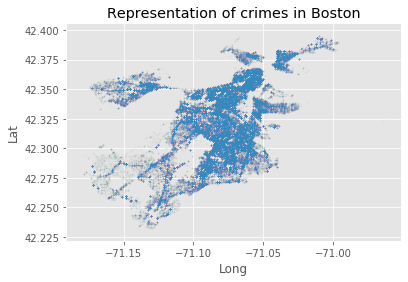

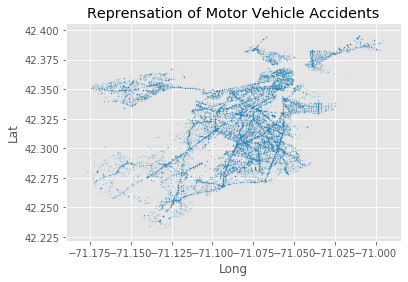

<Figure size 432x288 with 0 Axes>

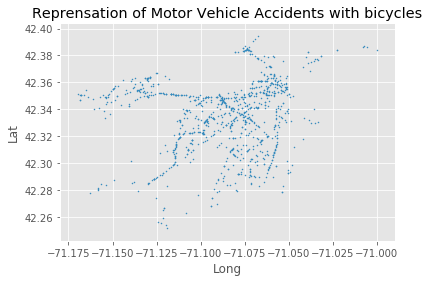

In [37]:
#Quick coordonates cleaning
crime_data.Lat.replace(-1, None, inplace=True)
crime_data.Long.replace(-1, None, inplace=True)

f1=plt.figure(1) #Figure of all different crimes
crime_data.plot(kind="scatter", x="Long", y="Lat", alpha=0.01, s=1)
plt.title('Representation of crimes in Boston')

f2=plt.figure(2) #Figure of vehicle crimes
vehicle_crimes=crime_data.loc[crime_data.OFFENSE_CODE_GROUP=='Motor Vehicle Accident Response']
vehicle_crimes.plot(kind="scatter", x="Long", y="Lat",alpha=0.1, s=1)
plt.title('Reprensation of Motor Vehicle Accidents')
plt.show()

f2=plt.figure(3)
bicycle_crimes=vehicle_crimes.loc[vehicle_crimes.OFFENSE_CODE.isin([3811,3810])]
bicycle_crimes.plot(kind="scatter", x="Long", y="Lat",alpha=1, s=1)
plt.title('Reprensation of Motor Vehicle Accidents with bicycles')
plt.show()

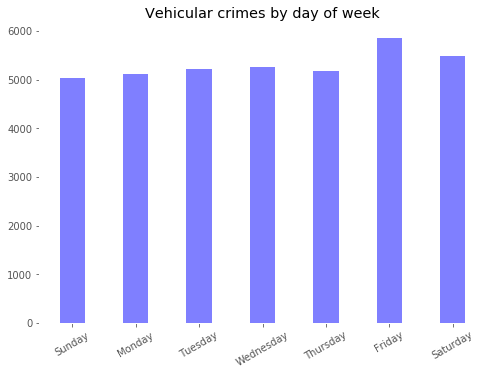

In [59]:
dow_set = vehicle_crimes.DAY_OF_WEEK.value_counts()

cats = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dow_set = dow_set.reindex(index=cats)

fig, ax = plt.subplots(figsize=(8, 5.5))
y_pos = np.arange(len(dow_set))
plt.bar(y_pos, dow_set.values, color='b', align='center', alpha=0.5, width= 0.4)
plt.xticks(y_pos, dow_set.keys(), rotation=30)
plt.title('Vehicular crimes by day of week')
plt.grid()
ax.set_facecolor('w')

### Vehicle accidents are most common on Fridays and Saturdays

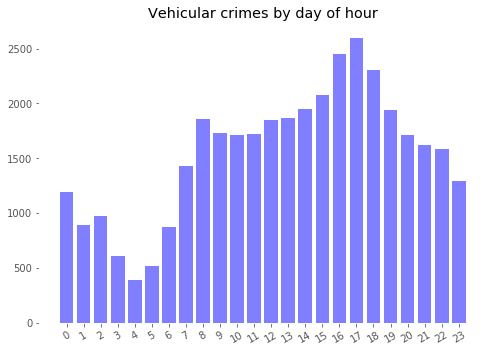

In [61]:
dow_set = vehicle_crimes.HOUR.value_counts()

y_pos = np.arange(len(dow_set))
dow_set = dow_set.reindex(index=y_pos)

fig, ax = plt.subplots(figsize=(8, 5.5))
plt.bar(y_pos, dow_set.values, color='b', align='center', alpha=0.5)
plt.xticks(y_pos, dow_set.keys(), rotation=30)
plt.title('Vehicular crimes by day of hour')
plt.grid()
ax.set_facecolor('w')

### Vehicle accidents spike in the early morning (8AM), but are most common in the evenings (1600-1800)

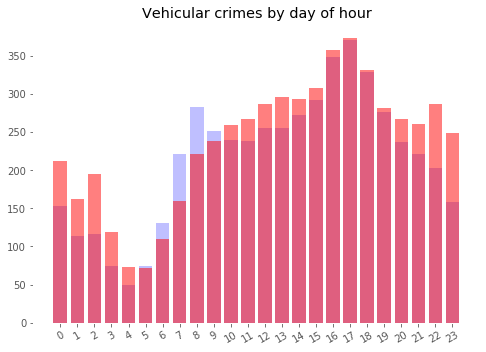

In [86]:
weekdays = vehicle_crimes.loc[vehicle_crimes.DAY_OF_WEEK.isin(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'])]
weekends = vehicle_crimes.loc[vehicle_crimes.DAY_OF_WEEK.isin(['Friday', 'Saturday'])]

weekday_hours = weekdays.HOUR.value_counts() #count accidents for each hour
weekend_hours = weekends.HOUR.value_counts()

weekday_hours = weekday_hours/5 #normalize
weekend_hours = weekend_hours/2

y_pos = np.arange(len(weekday_hours)) #reindex
weekday_hours = weekday_hours.reindex(index=y_pos)
weekend_hours = weekend_hours.reindex(index=y_pos)

fig, ax = plt.subplots(figsize=(8, 5.5)) #plot
plt.bar(y_pos, weekday_hours.values, color='b', align='center', alpha=0.25) #plot weekdays
plt.bar(y_pos, weekend_hours, color='r', align='center', alpha=.5) #plot weekends
plt.xticks(y_pos, weekday_hours.keys(), rotation=30)
plt.title('Vehicular crimes by day of hour')
plt.grid()
ax.set_facecolor('w')

Red = Weekend (Fri, Sat)

Bue = Weekday (Sun-Thurs)

### Accidents are more common during the morning commute on weekdays

### While accidents are more common throughout the afternoon on weekends, the maximum frequency in the evening is the same for both categories

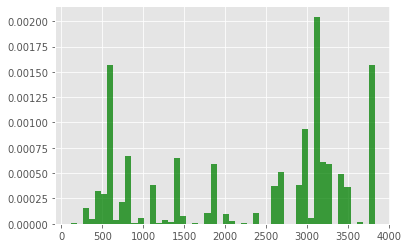

In [5]:
%matplotlib inline
plt.style.use('ggplot')

data_set = crime_data['OFFENSE_CODE'].values
n, bins, patches, = plt.hist(data_set, 50, density=1, facecolor='g', alpha=0.75)

plt.show()

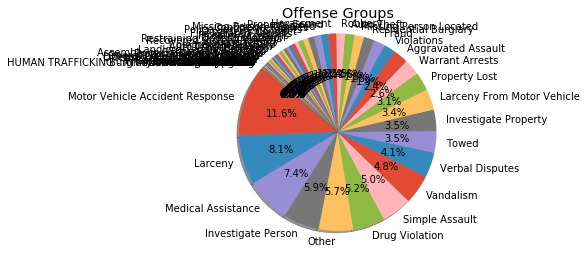

In [6]:
offense_group_counts = crime_data['OFFENSE_CODE_GROUP'].value_counts()

offense_groups = offense_group_counts.keys()
counts = offense_group_counts.values

plt.pie(counts, labels=offense_groups,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Offense Groups')

plt.axis('equal')
plt.show()